Titanic Survival Prediction

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv(r"C:\Users\P PAVAN REDDY\Downloads\titanic_train.csv")
test = pd.read_csv(r"C:\Users\P PAVAN REDDY\Downloads\titanic_test.csv")

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train.shape, test.shape

((891, 12), (418, 11))

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Null Values

In [8]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot: >

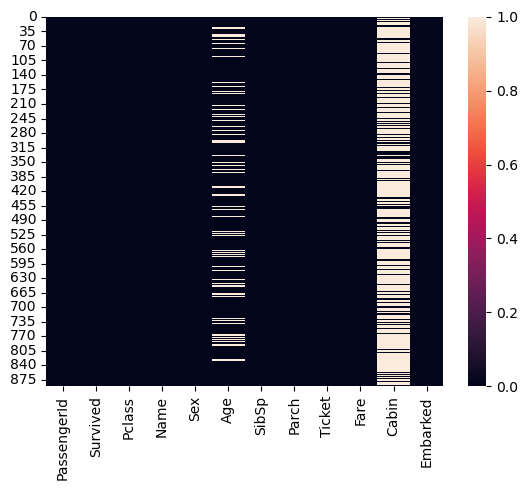

In [9]:
sns.heatmap(train.isna())

Age 

In [10]:
train.Age.isna().mean()

0.19865319865319866

In [11]:
train[train.Age.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [12]:
# simple imputer
train1 = train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1).copy()

from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(strategy='mean') #imputing mean 
imp_median = SimpleImputer(strategy='median') #imputing median

In [13]:
imp_mean.fit(train1[['Age']]) #fitting

SimpleImputer()

In [14]:
imp_median.fit(train1[['Age']])

SimpleImputer(strategy='median')

In [15]:
train1['Age_mean_imputed'] = imp_mean.transform(train1[['Age']])

In [16]:
train1['Age_median_imputed'] = imp_median.transform(train1[['Age']])

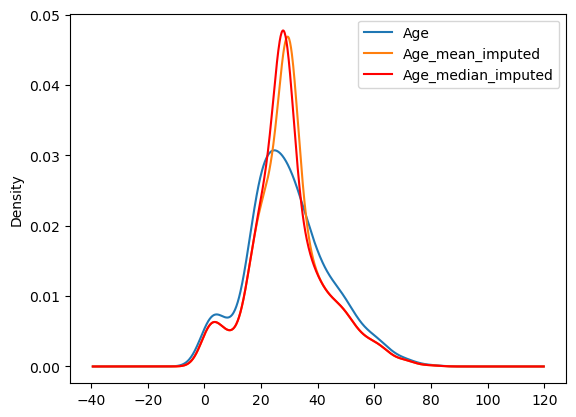

In [17]:
train1['Age'].plot(kind='kde', label='Age')
train1['Age_mean_imputed'].plot(kind='kde', label='Age_mean_imputed')
train1['Age_median_imputed'].plot(kind='kde', color='red', label='Age_median_imputed')

plt.legend()
plt.show()

we can see that the distribution of Age has changed so, let's try another method

Arbitrary value imputiation

In [18]:
#end of distribution is also same as arbitrary value imputiation but we impute with outliers
imp_constant = SimpleImputer(strategy='mean', fill_value=120) #imputing arbitrary value

In [19]:
imp_constant.fit(train1[['Age']])

SimpleImputer(fill_value=120)

In [20]:
train1['Age_constant_imputed']=imp_constant.transform(train1[['Age']])

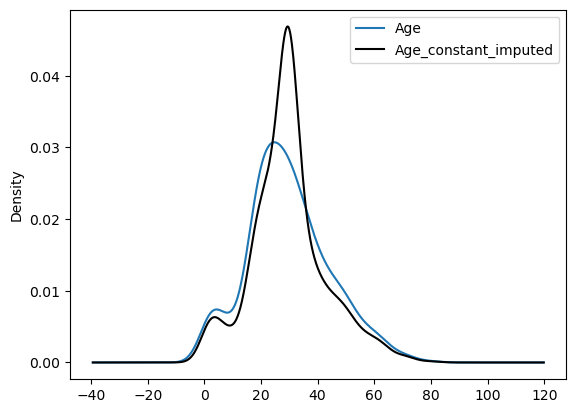

In [21]:
train1['Age'].plot(kind='kde', label='Age')
#train1['Age_mean_imputed'].plot(kind='kde', label='Age_mean_imputed')
#train1['Age_median_imputed'].plot(kind='kde', color='red', label='Age_median_imputed')
train1['Age_constant_imputed'].plot(kind='kde', color='black', label='Age_constant_imputed')

plt.legend()
plt.show()

Again Distribution of Age changed 

Random Imputiation

In [22]:
# imputation of NAs with random values from the remaining values in the dataset
train1['Age_random_imputed'] = train1.Age #first soring age col in new col 
train1['Age_random_imputed'][train1.Age_random_imputed.isnull()]=train1.Age.dropna().sample(train1.Age.isnull().sum(), random_state=0).values

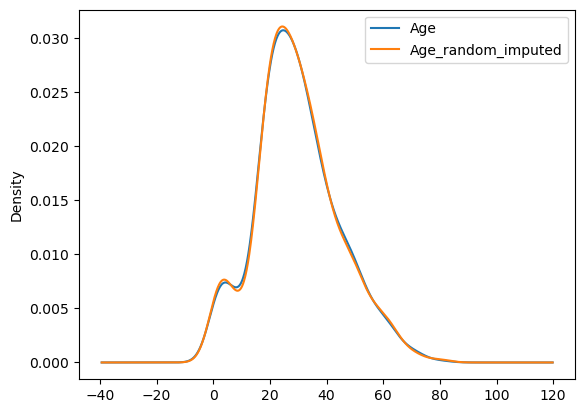

In [23]:
train1['Age'].plot(kind='kde', label='Age')
train1['Age_random_imputed'].plot(kind='kde', label='Age_random_imputed')

plt.legend()

we can see that distribution and descriptive stats are same is almost same

In [24]:
train1[['Age', 'Age_random_imputed']].describe(), train1[['Age', 'Age_random_imputed']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 714 non-null    float64
 1   Age_random_imputed  891 non-null    float64
dtypes: float64(2)
memory usage: 14.0 KB


(              Age  Age_random_imputed
 count  714.000000          891.000000
 mean    29.699118           29.700348
 std     14.526497           14.563654
 min      0.420000            0.420000
 25%     20.125000           21.000000
 50%     28.000000           28.000000
 75%     38.000000           38.000000
 max     80.000000           80.000000,
 None)

KNN Imputer

In [25]:
#all categorical variables should be encoded before using the KNNImputer
cat_variables = train1[['Sex', 'Embarked']]

cat_dummies = pd.get_dummies(cat_variables, drop_first=True) 

In [26]:
train1.drop(['Sex', 'Embarked'], axis=1, inplace=True)

In [27]:
train1 = pd.concat([train1, cat_dummies], axis=1)

train1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Age_mean_imputed,Age_median_imputed,Age_constant_imputed,Age_random_imputed,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,22.0,22.0,22.0,22.0,1,0,1
1,1,1,38.0,1,0,71.2833,38.0,38.0,38.0,38.0,0,0,0
2,1,3,26.0,0,0,7.9250,26.0,26.0,26.0,26.0,0,0,1
3,1,1,35.0,1,0,53.1000,35.0,35.0,35.0,35.0,0,0,1
4,0,3,35.0,0,0,8.0500,35.0,35.0,35.0,35.0,1,0,1


In [28]:
#as knn imputer is distance based imputation method, data should be normalized
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

train1 = pd.DataFrame(scaler.fit_transform(train1),columns=train1.columns)
train1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Age_mean_imputed,Age_median_imputed,Age_constant_imputed,Age_random_imputed,Sex_male,Embarked_Q,Embarked_S
0,0.0,1.0,0.271174,0.125,0.0,0.014151,0.271174,0.271174,0.271174,0.271174,1.0,0.0,1.0
1,1.0,0.0,0.472229,0.125,0.0,0.139136,0.472229,0.472229,0.472229,0.472229,0.0,0.0,0.0
2,1.0,1.0,0.321438,0.000,0.0,0.015469,0.321438,0.321438,0.321438,0.321438,0.0,0.0,1.0
3,1.0,0.0,0.434531,0.125,0.0,0.103644,0.434531,0.434531,0.434531,0.434531,0.0,0.0,1.0
4,0.0,1.0,0.434531,0.000,0.0,0.015713,0.434531,0.434531,0.434531,0.434531,1.0,0.0,1.0


In [29]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=3, weights="uniform")

train1['Age_knn_imputed1'] = knn_imputer.fit_transform(train1[['Age']]) #wrong

plt.suptitle("wrong", size=20)
train1['Age'].plot(kind='kde', label='Age')
train1['Age_knn_imputed1'].plot(kind='kde', label='Age_knn_imputed1')

plt.legend()

Eoor! It must be fit with all columns not with single column

In [30]:
train2 = pd.DataFrame(knn_imputer.fit_transform(train1), columns=train1.columns)

In [31]:
train2['Age']

0      0.271174
1      0.472229
2      0.321438
3      0.434531
4      0.434531
         ...   
886    0.334004
887    0.233476
888    0.321438
889    0.321438
890    0.396833
Name: Age, Length: 891, dtype: float64

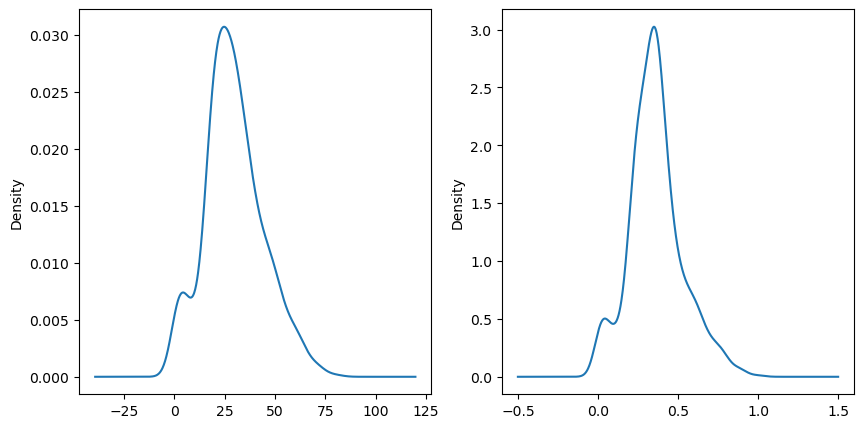

In [32]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
train['Age'].plot(kind='kde')
xlabel='Age'

plt.subplot(1,2,2)
train2['Age'].plot(kind='kde', label='knn_impted_Age')
xlabel='Age_knn_imputed'

plt.show()


let's try with weights = 'distance'

In [33]:
knn_imputer = KNNImputer(n_neighbors=4, weights="distance")

In [34]:
train2 = pd.DataFrame(knn_imputer.fit_transform(train2), columns=train2.columns)

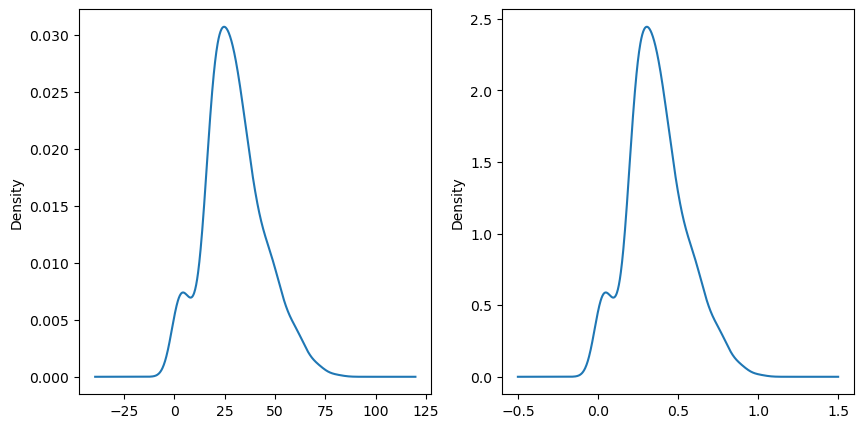

In [35]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
train['Age'].plot(kind='kde')
xlabel='Age'

plt.subplot(1,2,2)
train1['Age'].plot(kind='kde', label='knn_impted_Age')
xlabel='Age_knn_imputed'

plt.show()

distributions almost look like same

Iterative Imputer (MICE)

In [36]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [37]:
itr_imputer = IterativeImputer(random_state=0)

In [38]:
itr_imputer.fit(train1)

IterativeImputer(random_state=0)

In [39]:
train3 = pd.DataFrame(itr_imputer.transform(train1), columns=train2.columns)

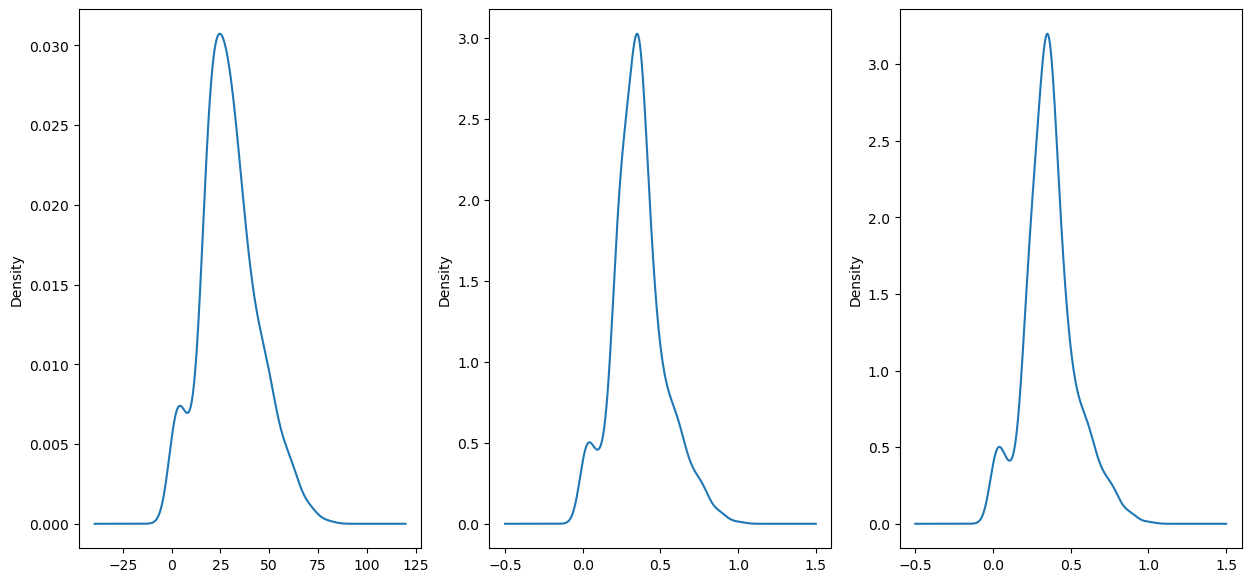

In [51]:
plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
train['Age'].plot(kind='kde')

plt.subplot(1,3,2)
train2['Age'].plot(kind='kde', label='knn_impted_Age')
xlabel='Age_knn_imputed'

plt.subplot(1,3,3)
train3['Age'].plot(kind='kde', label='itr_impted_Age')
xlabel='Age_knn_imputed'

plt.show()

Distributions are almost same

Cabin

In [41]:
train1 = pd.read_csv(r"C:\Users\P PAVAN REDDY\Downloads\titanic_train.csv")

In [42]:
train1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [44]:
train1['Cabin'].isna().mean() #more than 77% is missing let's impute arbitrary value

0.7710437710437711

In [45]:
imp_constant = SimpleImputer(strategy='constant', fill_value="Missing")
imp_constant.fit(train1[['Cabin']]) #fitting

SimpleImputer(fill_value='Missing', strategy='constant')

In [46]:
train1['Cabin_constant_imputed']=imp_constant.transform(train1[['Cabin']])

<AxesSubplot: >

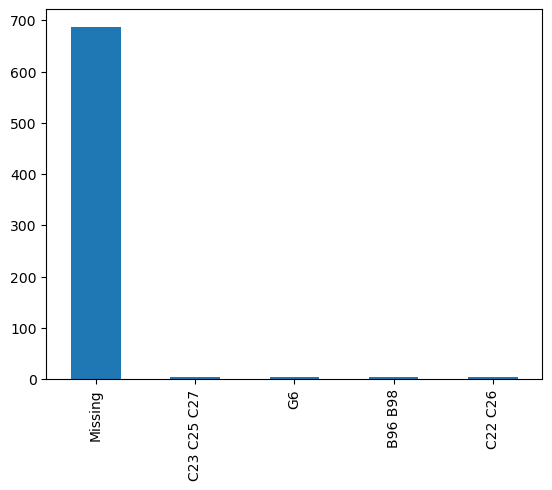

In [47]:
train1['Cabin_constant_imputed'].value_counts().head().plot(kind='bar')

In [48]:
train1['Cabin_constant_imputed'].isna().sum()

0

Embarked

In [53]:
train1.Embarked.isna().sum()

2

In [55]:
train1[train1.Embarked.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_constant_imputed
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,B28
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,B28


In [56]:
#filling with most frequent category in the Embarked
imp_mode = SimpleImputer(strategy='most_frequent')

In [62]:
train1['Embarked_mode_imputed']=imp_mode.fit_transform(train1[['Embarked']])

In [63]:
train1.Embarked_mode_imputed.isna().sum()

0